# TF-IDF with K-means clustering

While _TF-IDF_ was presented in the last section, for us to understand what the metric is, here we will use it to cluster documents (or IMDb plots in our case) using the K-means clustering algorithm. As you will see, to achieve this, we will use sci-kit's `sklearn` packages, making the _TF-IDF_ vectorisation quite easy!

## Loading the IMDb dataset

Load the IMDb dataset and look closely at the 'Plot' column

In [47]:
# code goes here

Make a list of plots, filtering out any non-string like entities from the dataframe.

In [43]:
list_plots = df_imdb['Plot'].tolist()

# code goes here

## Preprocessor: Strip punctuation from text

As you can see below, `sklearn` allows us to preprocess the strings it takes as input (our list of plots) by asking for a function taking a single string as input and returning a cleaned up string as output. Complete the function below by stripping out any punctionation from the input. Try utilising python's `string` library to do so.

In [44]:
import string 

def preprocess(text):
    return # code goes here

# preprocess(list_plots[5])

## TF-IDF and K-means

Sci-kit's `sklearn` library has both _TF-IDF_ and K-means clustring functionality which we can use in conjunction together. As you can see below, the `TfidfVectorizer` can be used to compute _TF-IDF_ out of a list of documents (plots in our case). Interestingly, the vectorizer has both stop_words and preprocessor functionalities, something that ressembles the types of string manipulation we did in the previous section. When the `tfidf` matrix (yes, it is a matrix here) is computed, `KMeans` is used to cluster documents according to the content of their respective `tfidf` vector. 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess, lowercase=True, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(list_plots)

kmeans = KMeans(n_clusters=6).fit(tfidf)

What does the kmeans variable hold in terms of data? What are the kmeans labels?

In [35]:
# code goes here

One thing which is interesting with kmeans is that one can predict the cluster of new data. As we are working with text here, this prediction is rather easy to test using the above `tfidf_vectorizer` and `kmeans`. 

In [42]:
sentences_to_predict = ["I am a young person looking for an apartment in San Francisco", "I really like the old vibes and of Miami"]
kmeans.predict(tfidf_vectorizer.transform(sentences_to_predict))

array([5, 0], dtype=int32)

## Visualise clusters

Below is a (modified) plot function from our manual discussed in Ch.7. section 7.4.2. It displays clusters in a graph. It is the __same__ function we saw last week in _03-k-means-clustering_. 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot(user_ratings, k):

        h = 0.2
        reduced_data = PCA(n_components=2).fit_transform(user_ratings)

        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit(reduced_data)

        x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
        y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)

        plt.figure(1)
        plt.clf()
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

        centroids = kmeans.cluster_centers_
        plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='r', zorder=10)
        plt.title('K-means clustering of the user')

Use the function above to display the computed _TF-IDF_ clusters.  

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


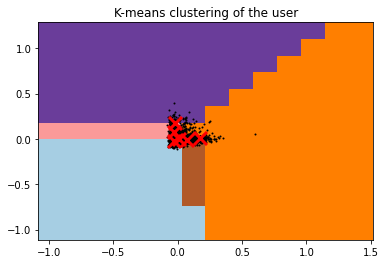

In [37]:
from scipy.sparse import dok_matrix

# code goes here

## Saving clusters

Save your clusters in a pandas dataframe.

In [ ]:
# code goes here